# Unlocking the Secrets of Sales with EDA 📈

## Introduction

In the realm of data-driven decision-making, understanding customer behavior and sales patterns is crucial for any business aiming to enhance its performance. This project delves into a comprehensive Exploratory Data Analysis (EDA) of a sales dataset to unearth valuable insights that can steer sales growth and refine marketing strategies.

## Data Overview

The dataset explored in this project, sourced from Kaggle, encompasses sales records with a specific focus on the most recent orders placed by customers. It is important to note that the dataset provides a limited view, primarily highlighting the latest transactions without extensive historical data. Key points include:

**Limited Historical Data:** The dataset primarily captures the last orders of customers, offering a snapshot of recent activity rather than a comprehensive historical record.

**Previous Purchases:** While the dataset includes a count of previous purchases, it lacks detailed information about these past transactions, such as item specifics or purchase amounts.

**Lack of Date Information:** Due to the focus on the most recent orders, the dataset does not contain date information for transactions. Instead, the 'Frequency of Purchases' column provides categorical data (e.g., 'Weekly', 'Monthly') indicating the general frequency of purchases.

**Objective:** Given the constraints of the dataset, the aim is to maximize the insights that can be derived from the available data. The analysis will focus on understanding customer behavior and sales patterns from the recent orders and frequency information provided.

By leveraging the data at hand, this project seeks to uncover actionable insights that can inform sales strategies and marketing efforts, despite the limitations in historical depth.

## Libraries Import and Data Loading

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd

# Import libraries for mathematical operations
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for advanced statistical operations
from scipy import stats

# Disable future warnings about 'observed' parameter in pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Define the file path
file_path = '/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

## Data Preview

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Check the shape of the DataFrame
df.shape

(3900, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [7]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Examine the distribution of each categorical column using the value_counts() method
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts()) 
    print("\n")

Value counts for Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


Value counts for Item Purchased:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


Value counts for Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Value counts for Location:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland       

## Data Cleaning

In [8]:
# Check for missing values in each column
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

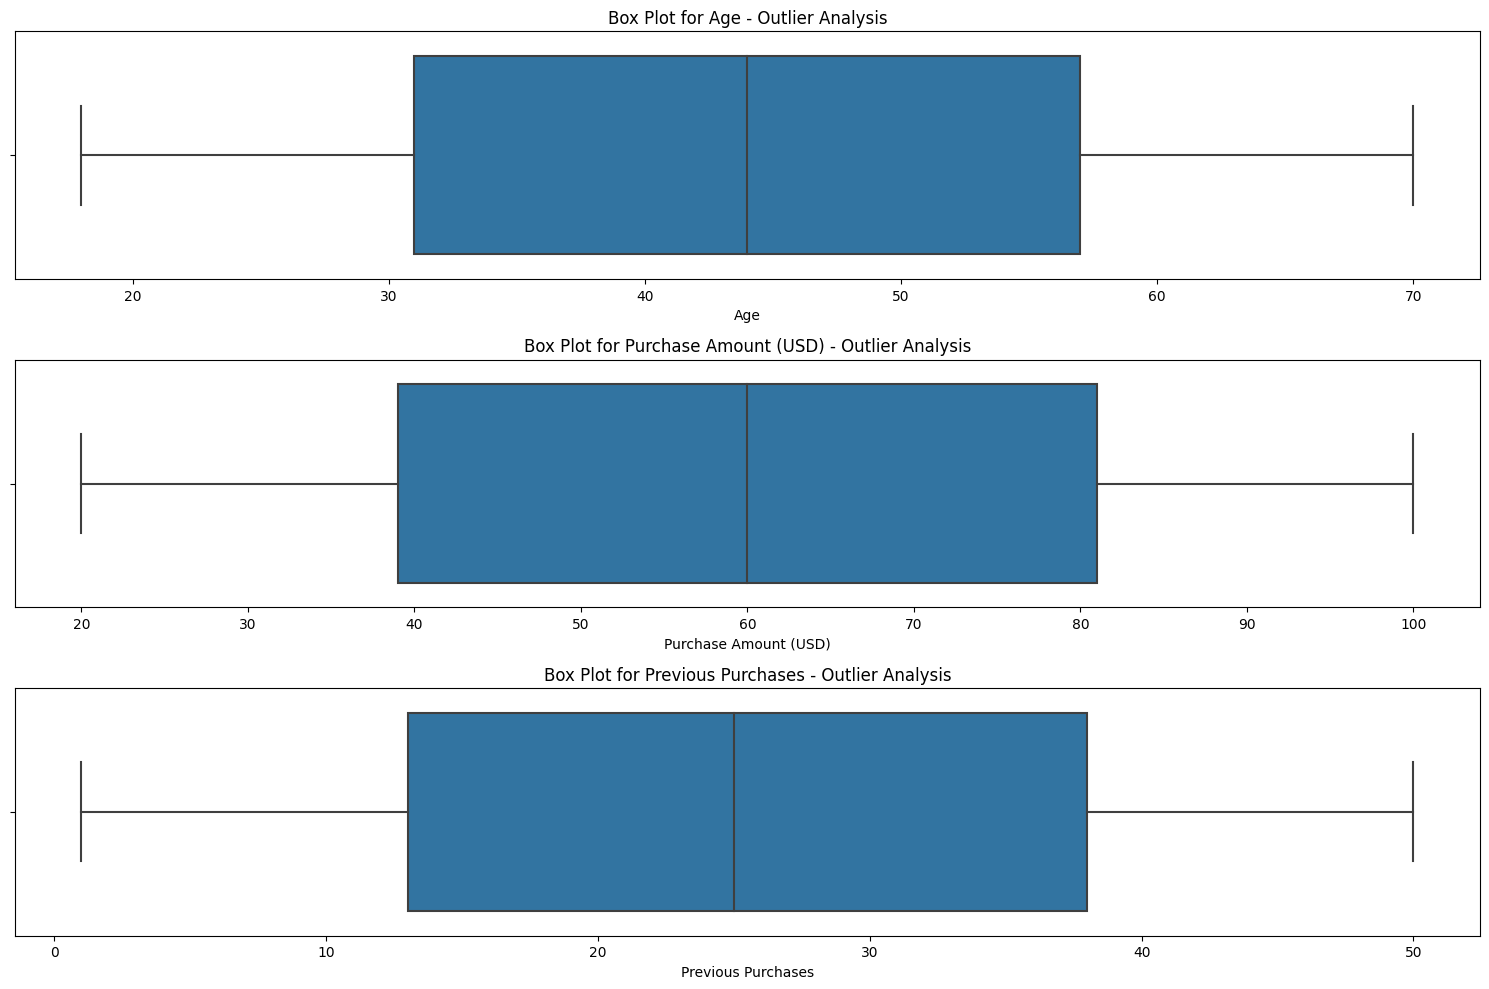

In [9]:
# Analyze outliers in numerical columns using box plots
numeric_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
plt.figure(figsize=(15, 10))  # Set the figure size
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(x=df[column])  # Plot the box plot
    plt.title(f"Box Plot for {column} - Outlier Analysis")  # Set the title for each subplot

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()  # Display the plots

In [10]:
# Examine unique values in categorical columns to check for outliers or inconsistencies
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")  # Add a blank line for spacing

Unique values in Gender:
['Male' 'Female']


Unique values in Item Purchased:
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']


Unique values in Category:
['Clothing' 'Footwear' 'Outerwear' 'Accessories']


Unique values in Location:
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


Uni

In [11]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"There are {duplicate_rows} duplicate rows in the dataset.")
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


In [12]:
# Correcting duplicate values in the 'Frequency of Purchases' column
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace({'Bi-Weekly': 'Fortnightly', 'Every 3 Months': 'Quarterly'})

In [13]:
# Creating a crosstab
cross_tab = pd.crosstab(df['Discount Applied'], df['Promo Code Used'])

# Displaying the crosstab
print(cross_tab)

Promo Code Used     No   Yes
Discount Applied            
No                2223     0
Yes                  0  1677


In [14]:
# Performing a chi-squared test of independence using stats.chi2_contingency
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# Displaying the p-value
print('p-value:', p)

p-value: 0.0


In [15]:
# Remove the 'Discount Applied' column as it duplicates the information in 'Promo Code Used'
df.drop('Discount Applied', axis=1, inplace=True)

## Feature Engineering

In [16]:
# Creating Age Groups
# Define age bins and labels for categorizing customers into age groups
age_bins = [18, 31, 46, 61, 100]
age_labels = ['18-30', '31-45', '46-60', '60+']

# Create a new column 'Age_Group' to assign each customer to an age group
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the distribution of customers across age groups
print("Distribution of Customers by Age Group:")
print(df['AgeGroup'].value_counts().sort_index())

Distribution of Customers by Age Group:
AgeGroup
18-30     949
31-45    1093
46-60    1135
60+       723
Name: count, dtype: int64


In [17]:
# Convert Purchase Frequency to Daily Intervals
# Adjusting the 'Frequency of Purchases' column to reflect the changes made earlier.
frequency_to_days = {
    'Weekly': 7,
    'Fortnightly': 14,  # Using 'Fortnightly' instead of 'Bi-Weekly'
    'Monthly': 30,  # Assuming 30 days in a month
    'Quarterly': 90,  # Using 'Quarterly' instead of 'Every 3 Months'
    'Annually': 365
}

# Convert the 'Frequency of Purchases' column to days
df['PurchaseFrequencyDays'] = df['Frequency of Purchases'].map(frequency_to_days)

# Calculate the average purchase frequency in days
df['AveragePurchaseFrequency'] = (df['Previous Purchases'] + 1) / df['PurchaseFrequencyDays']

## Exploratory Data Analysis (EDA)

In [18]:
# Calculate the number of customers in each age group
customer_counts_by_age_group = df['AgeGroup'].value_counts().sort_index()
print("Customer Counts by Age Group:")
print(customer_counts_by_age_group)

Customer Counts by Age Group:
AgeGroup
18-30     949
31-45    1093
46-60    1135
60+       723
Name: count, dtype: int64


In [19]:
# Average purchase amount by age group
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
# The average is taken for each age group to understand the spending behavior of different age groups.
average_purchase_amount_by_age_group = df.groupby('AgeGroup')['Purchase Amount (USD)'].mean().reset_index()
print("Average Purchase Amount by Age Group:")
print(average_purchase_amount_by_age_group)

Average Purchase Amount by Age Group:
  AgeGroup  Purchase Amount (USD)
0    18-30              60.357218
1    31-45              59.402562
2    46-60              59.657269
3      60+              59.701245


In [20]:
# Average purchase frequency by age group (in days)
average_purchase_frequency_days_by_age_group = df.groupby('AgeGroup')['PurchaseFrequencyDays'].mean().reset_index()
print("Average Purchase Frequency by Age Group (in days):")
print(average_purchase_frequency_days_by_age_group)

Average Purchase Frequency by Age Group (in days):
  AgeGroup  PurchaseFrequencyDays
0    18-30              84.298209
1    31-45              91.883806
2    46-60              86.630837
3      60+              95.248963


In [21]:
# Average purchase frequency (in terms of number of purchases) by age group
# Average purchase frequency is calculated as (Previous Purchases + 1) / PurchaseFrequencyDays to include the most recent purchase.
average_purchase_frequency_by_age_group = df.groupby('AgeGroup')['AveragePurchaseFrequency'].mean().reset_index()
print("Average Purchase Frequency by Age Group (in terms of number of purchases):")
print(average_purchase_frequency_by_age_group)

Average Purchase Frequency by Age Group (in terms of number of purchases):
  AgeGroup  AveragePurchaseFrequency
0    18-30                  1.234822
1    31-45                  1.227467
2    46-60                  1.310257
3      60+                  1.317593


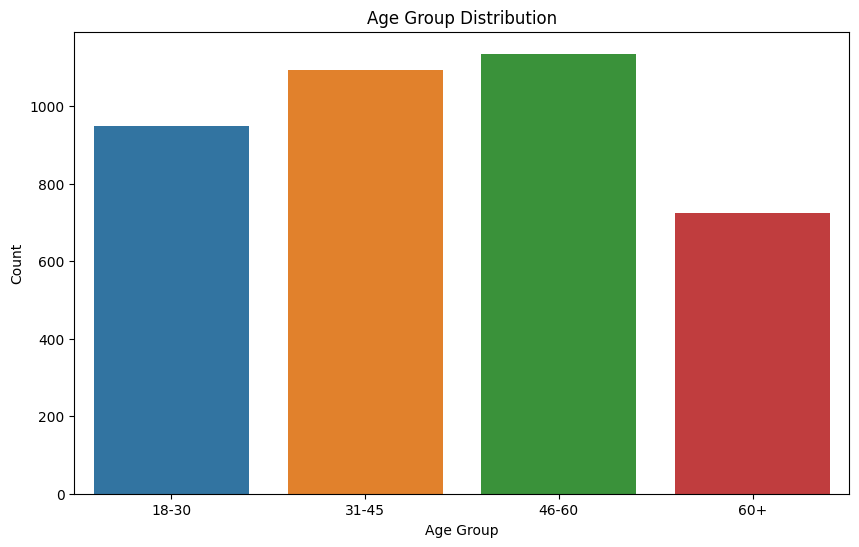

In [22]:
# Age Group distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=df, order=['18-30', '31-45', '46-60', '60+'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

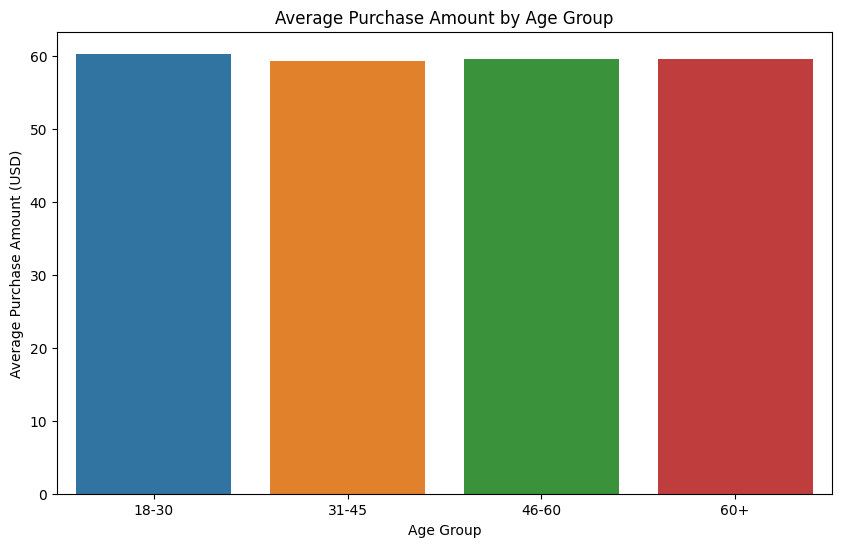

In [23]:
# Visualization for average purchase amount by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Purchase Amount (USD)', data=average_purchase_amount_by_age_group, order=['18-30', '31-45', '46-60', '60+'])
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

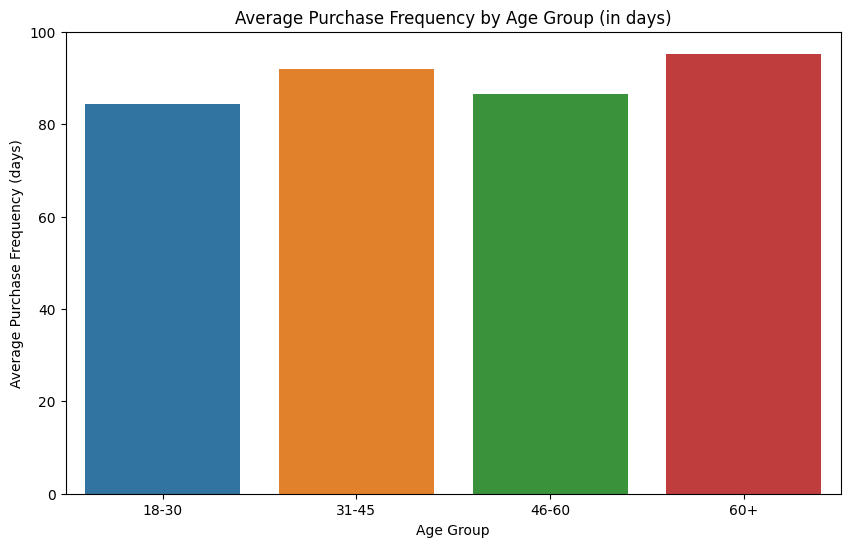

In [24]:
# Visualization for average purchase frequency by age group (in days)
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='PurchaseFrequencyDays', data=average_purchase_frequency_days_by_age_group, order=['18-30', '31-45', '46-60', '60+'])
plt.title('Average Purchase Frequency by Age Group (in days)')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Frequency (days)')
plt.show()

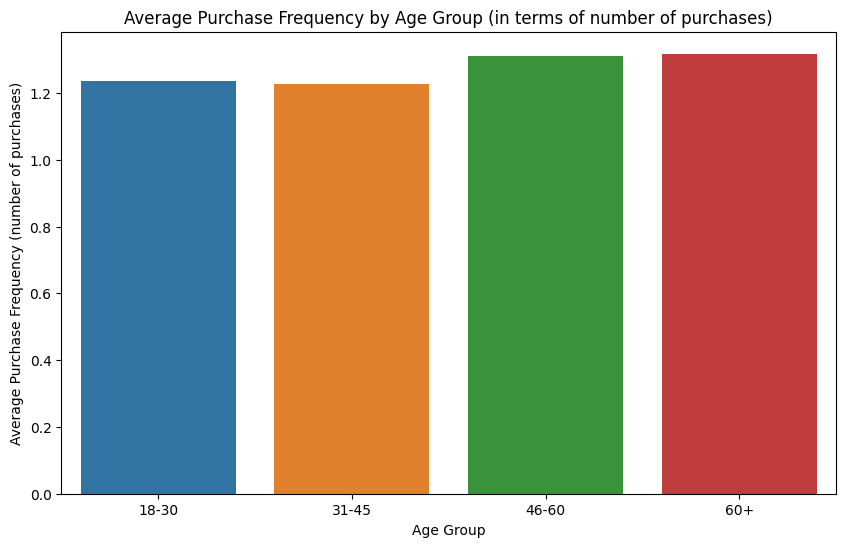

In [25]:
# Visualization for average purchase frequency by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='AveragePurchaseFrequency', data=average_purchase_frequency_by_age_group, order=['18-30', '31-45', '46-60', '60+'])
plt.title('Average Purchase Frequency by Age Group (in terms of number of purchases)')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Frequency (number of purchases)')
plt.show()

In [26]:
# Calculate the number of customers by gender
customer_counts_by_gender = df['Gender'].value_counts()
print("Customer Counts by Gender:")
print(customer_counts_by_gender)

Customer Counts by Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


In [27]:
# Calculate the average purchase amount by gender
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
average_purchase_amount_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()
print("\nAverage Purchase Amount by Gender:")
print(average_purchase_amount_by_gender)


Average Purchase Amount by Gender:
   Gender  Purchase Amount (USD)
0  Female              60.249199
1    Male              59.536199


In [28]:
# Calculate the average purchase frequency by gender (in terms of number of purchases)
average_purchase_frequency_by_gender = df.groupby('Gender')['AveragePurchaseFrequency'].mean().reset_index()
print("\nAverage Purchase Frequency by Gender (in terms of number of purchases):")
print(average_purchase_frequency_by_gender)


Average Purchase Frequency by Gender (in terms of number of purchases):
   Gender  AveragePurchaseFrequency
0  Female                  1.196955
1    Male                  1.304460


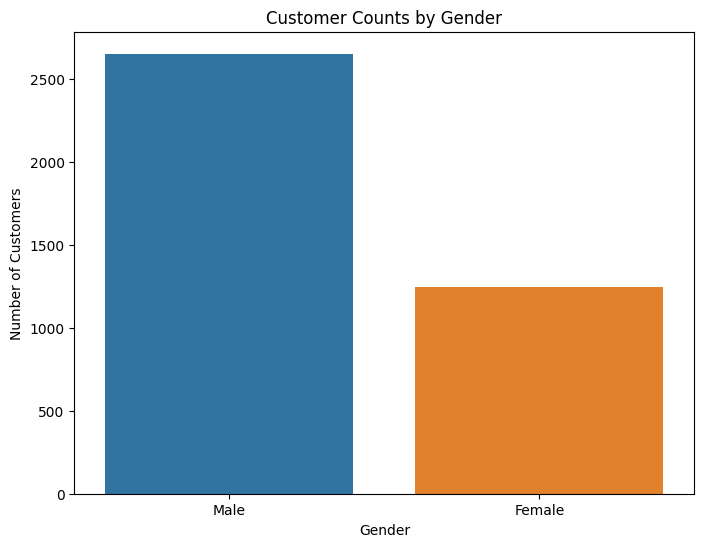

In [29]:
# Visualization for the number of customers by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts_by_gender.index, y=customer_counts_by_gender.values)
plt.title('Customer Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

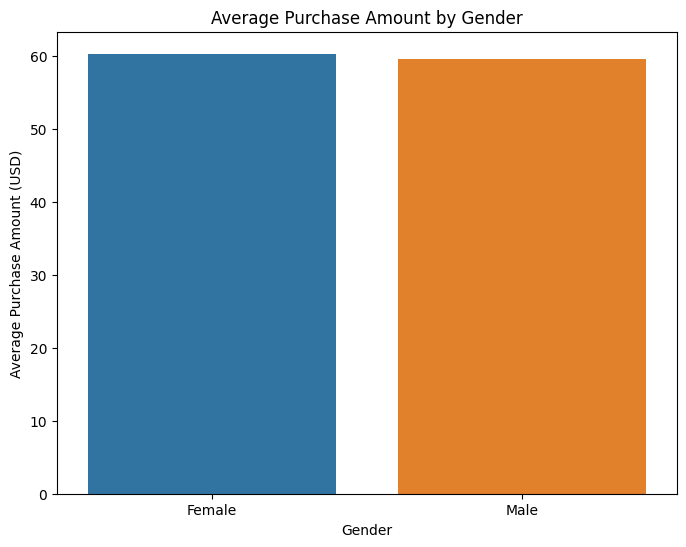

In [30]:
# Visualization for average purchase amount by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=average_purchase_amount_by_gender)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

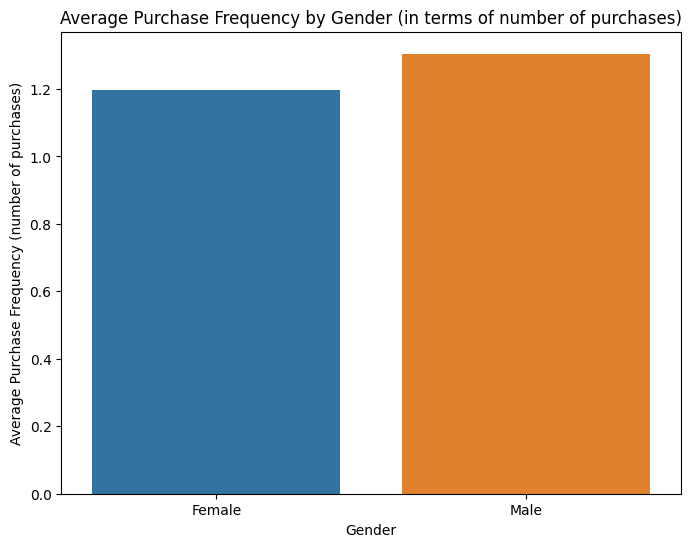

In [31]:
# Visualization for average purchase frequency by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='AveragePurchaseFrequency', data=average_purchase_frequency_by_gender)
plt.title('Average Purchase Frequency by Gender (in terms of number of purchases)')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Frequency (number of purchases)')
plt.show()

In [32]:
# Calculate the number of purchases by category
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
purchase_counts_by_category = df['Category'].value_counts()
print("Purchase Counts by Category:")
print(purchase_counts_by_category)

Purchase Counts by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [33]:
# Calculate the average purchase amount by category
average_purchase_amount_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()
print("\nAverage Purchase Amount by Category:")
print(average_purchase_amount_by_category)


Average Purchase Amount by Category:
      Category  Purchase Amount (USD)
0  Accessories              59.838710
1     Clothing              60.025331
2     Footwear              60.255426
3    Outerwear              57.172840


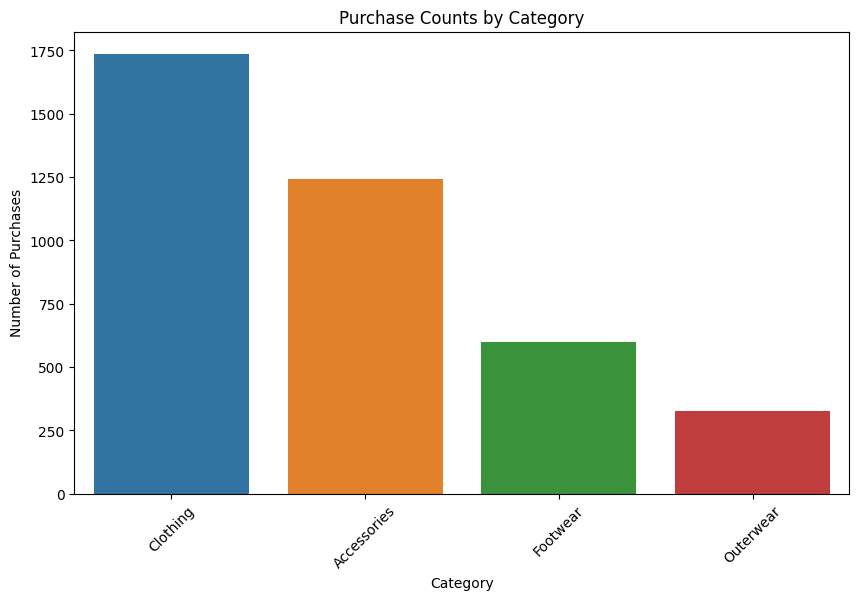

In [34]:
# Visualization for the number of purchases by category
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_counts_by_category.index, y=purchase_counts_by_category.values)
plt.title('Purchase Counts by Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

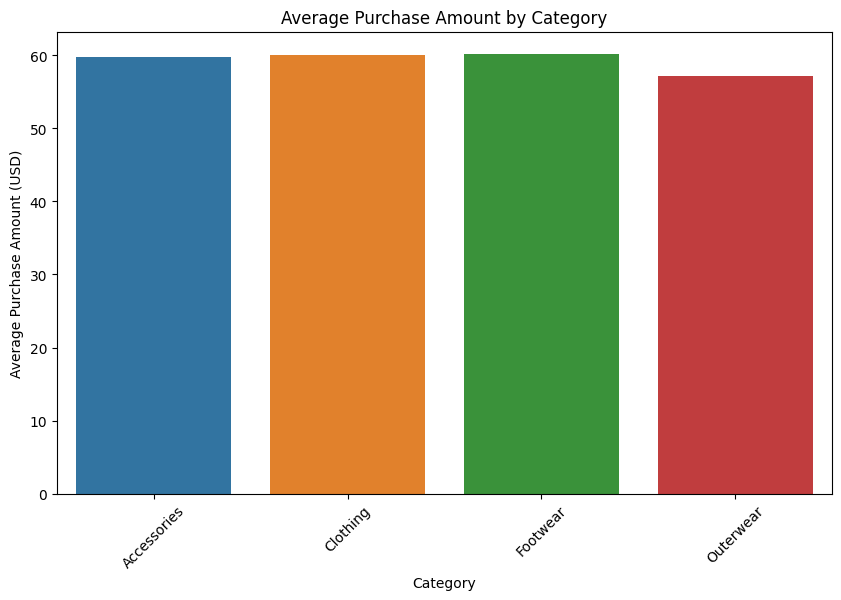

In [35]:
# Visualization for average purchase amount by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=average_purchase_amount_by_category)
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Calculate the number of purchases by season
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
purchase_counts_by_season = df['Season'].value_counts()
print("Purchase Counts by Season:")
print(purchase_counts_by_season)

Purchase Counts by Season:
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


In [37]:
# Calculate the average purchase amount by season
average_purchase_amount_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()
print("\nAverage Purchase Amount by Season:")
print(average_purchase_amount_by_season)


Average Purchase Amount by Season:
   Season  Purchase Amount (USD)
0    Fall              61.556923
1  Spring              58.737738
2  Summer              58.405236
3  Winter              60.357364


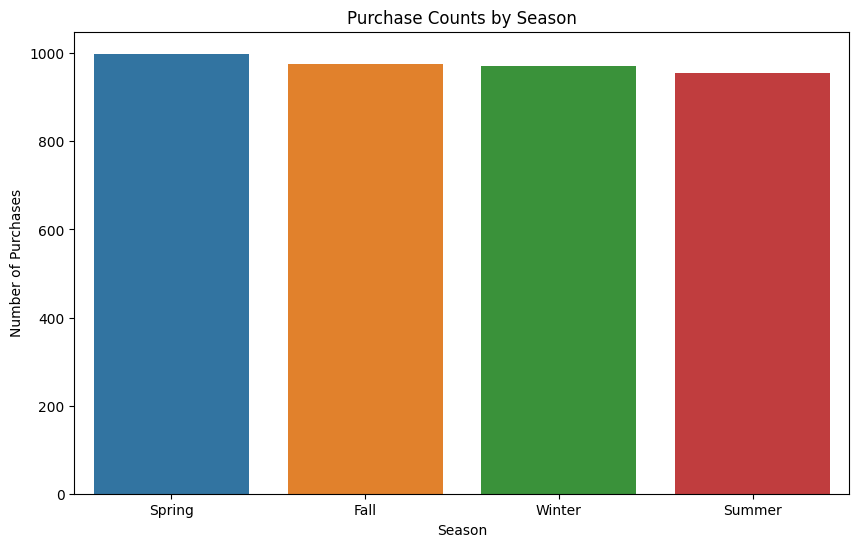

In [38]:
# Visualization for the number of purchases by season
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_counts_by_season.index, y=purchase_counts_by_season.values)
plt.title('Purchase Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.show()

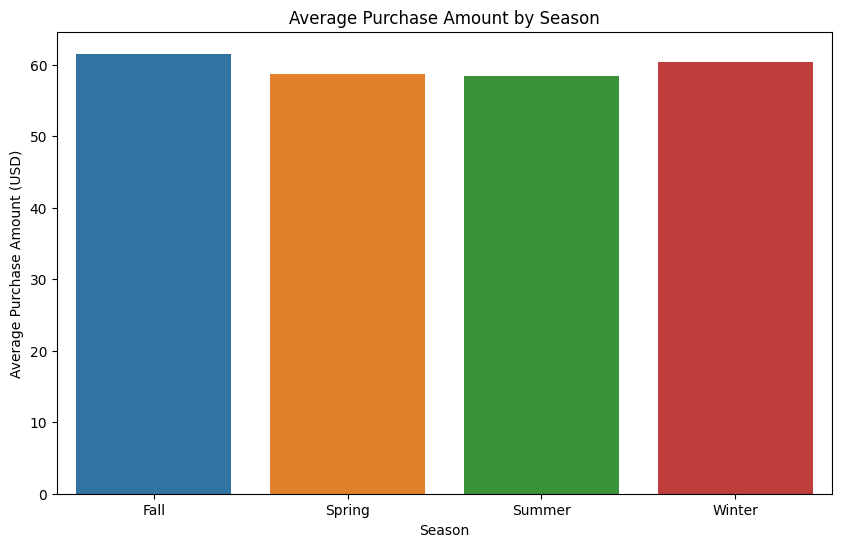

In [39]:
# Visualization for average purchase amount by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', data=average_purchase_amount_by_season)
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

In [40]:
# Calculate the correlation between average purchase frequency (in terms of number of purchases) and purchase amount
correlation_frequency_amount = df[['AveragePurchaseFrequency', 'Purchase Amount (USD)']].corr()
print("\nCorrelation between Average Purchase Frequency (in terms of number of purchases) and Purchase Amount:")
print(correlation_frequency_amount)


Correlation between Average Purchase Frequency (in terms of number of purchases) and Purchase Amount:
                          AveragePurchaseFrequency  Purchase Amount (USD)
AveragePurchaseFrequency                  1.000000              -0.006484
Purchase Amount (USD)                    -0.006484               1.000000


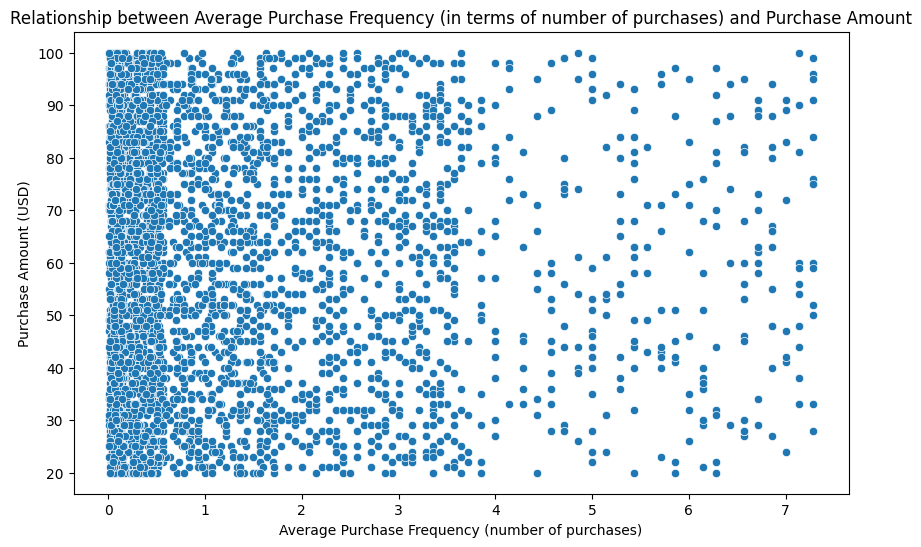

In [41]:
# Visualization for the relationship between average purchase frequency (in terms of number of purchases) and purchase amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveragePurchaseFrequency', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Average Purchase Frequency (in terms of number of purchases) and Purchase Amount')
plt.xlabel('Average Purchase Frequency (number of purchases)')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [42]:
# Calculate the number of customers by subscription status
customer_counts_by_subscription = df['Subscription Status'].value_counts()
print("Customer Counts by Subscription Status:")
print(customer_counts_by_subscription)

Customer Counts by Subscription Status:
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


In [43]:
# Calculate the average purchase amount by subscription status
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
average_purchase_amount_by_subscription = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index()
print("\nAverage Purchase Amount by Subscription Status:")
print(average_purchase_amount_by_subscription)


Average Purchase Amount by Subscription Status:
  Subscription Status  Purchase Amount (USD)
0                  No              59.865121
1                 Yes              59.491928


In [44]:
# Calculate the average purchase frequency by subscription status (in terms of number of purchases)
average_purchase_frequency_by_subscription = df.groupby('Subscription Status')['AveragePurchaseFrequency'].mean().reset_index()
print("\nAverage Purchase Frequency by Subscription Status (in terms of number of purchases):")
print(average_purchase_frequency_by_subscription)


Average Purchase Frequency by Subscription Status (in terms of number of purchases):
  Subscription Status  AveragePurchaseFrequency
0                  No                  1.237178
1                 Yes                  1.358957


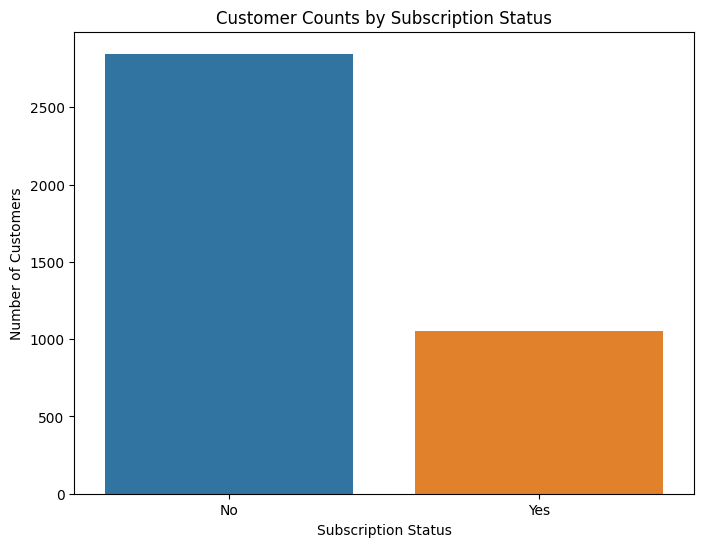

In [45]:
# Visualization for the number of customers by subscription status
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts_by_subscription.index, y=customer_counts_by_subscription.values)
plt.title('Customer Counts by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')
plt.show()

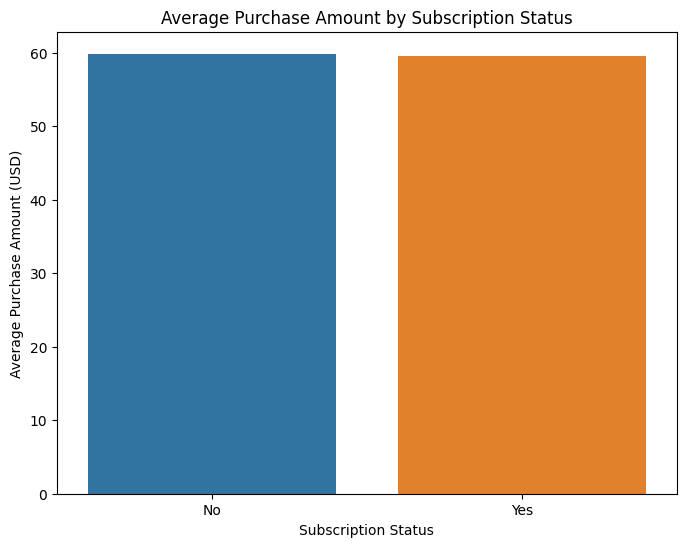

In [46]:
# Visualization for average purchase amount by subscription status
plt.figure(figsize=(8, 6))
sns.barplot(x='Subscription Status', y='Purchase Amount (USD)', data=average_purchase_amount_by_subscription)
plt.title('Average Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

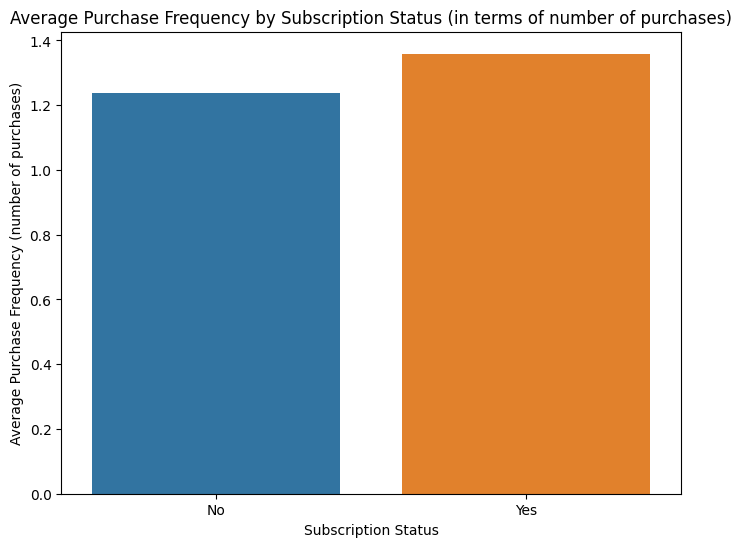

In [47]:
# Visualization for average purchase frequency by subscription status
plt.figure(figsize=(8, 6))
sns.barplot(x='Subscription Status', y='AveragePurchaseFrequency', data=average_purchase_frequency_by_subscription)
plt.title('Average Purchase Frequency by Subscription Status (in terms of number of purchases)')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Frequency (number of purchases)')
plt.show()

In [48]:
# Calculate the number of customers by promo code usage
customer_counts_by_promo = df['Promo Code Used'].value_counts()
print("Customer Counts by Promo Code Usage:")
print(customer_counts_by_promo)

Customer Counts by Promo Code Usage:
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64


In [49]:
# Calculate the average purchase amount by promo code usage
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
average_purchase_amount_by_promo = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().reset_index()
print("\nAverage Purchase Amount by Promo Code Usage:")
print(average_purchase_amount_by_promo)


Average Purchase Amount by Promo Code Usage:
  Promo Code Used  Purchase Amount (USD)
0              No              60.130454
1             Yes              59.279070


In [50]:
# Calculate the average purchase frequency by promo code usage (in terms of number of purchases)
average_purchase_frequency_by_promo = df.groupby('Promo Code Used')['AveragePurchaseFrequency'].mean().reset_index()
print("\nAverage Purchase Frequency by Promo Code Usage (in terms of number of purchases):")
print(average_purchase_frequency_by_promo)


Average Purchase Frequency by Promo Code Usage (in terms of number of purchases):
  Promo Code Used  AveragePurchaseFrequency
0              No                  1.239031
1             Yes                  1.311189


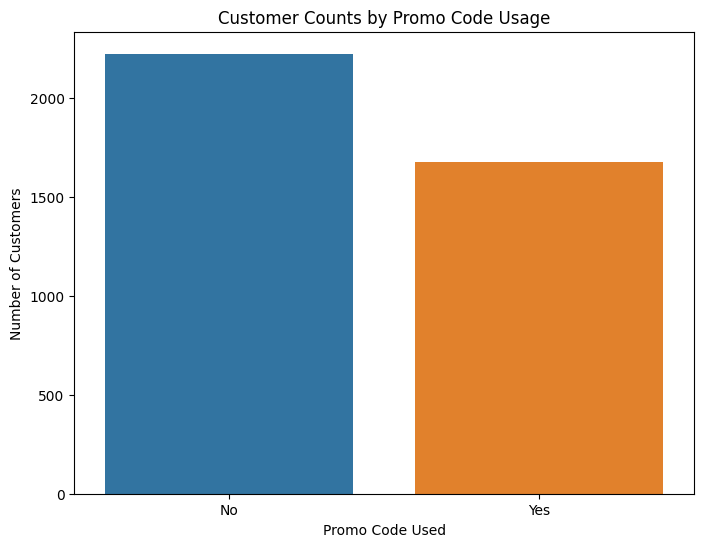

In [51]:
# Visualization for the number of customers by promo code usage
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts_by_promo.index, y=customer_counts_by_promo.values)
plt.title('Customer Counts by Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Number of Customers')
plt.show()

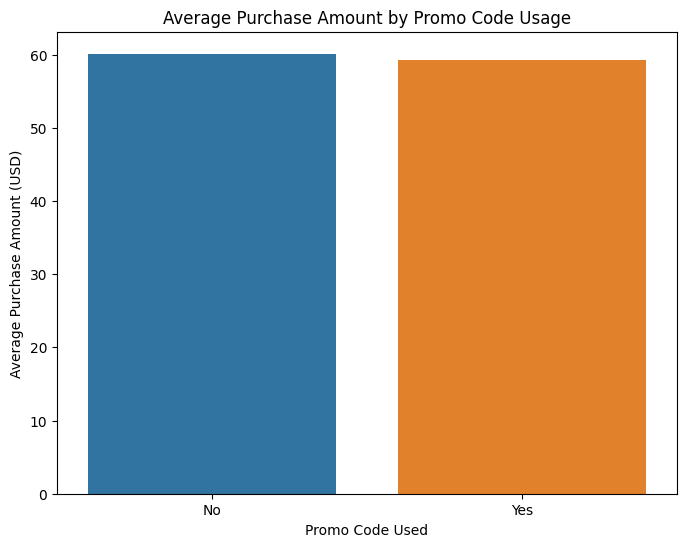

In [52]:
# Visualization for average purchase amount by promo code usage
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=average_purchase_amount_by_promo)
plt.title('Average Purchase Amount by Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

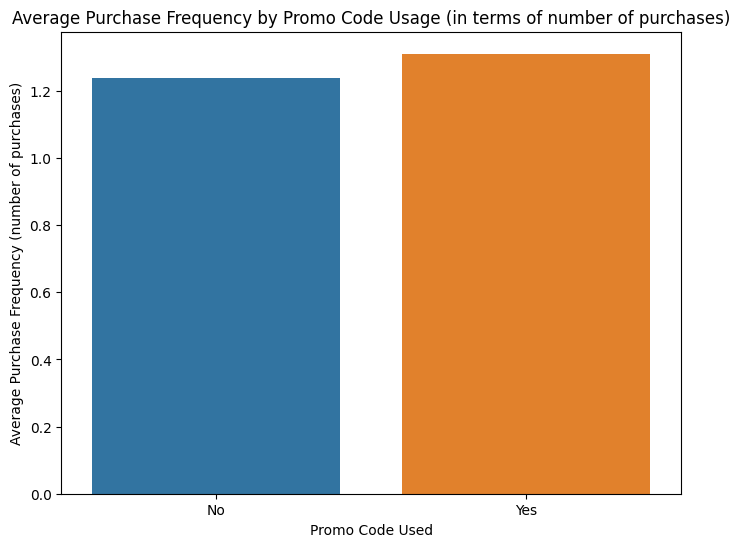

In [53]:
# Visualization for average purchase frequency by promo code usage
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo Code Used', y='AveragePurchaseFrequency', data=average_purchase_frequency_by_promo)
plt.title('Average Purchase Frequency by Promo Code Usage (in terms of number of purchases)')
plt.xlabel('Promo Code Used')
plt.ylabel('Average Purchase Frequency (number of purchases)')
plt.show()

In [54]:
# Calculate the distribution of review ratings
review_rating_distribution = df['Review Rating'].value_counts().sort_index()
print("Review Rating Distribution:")
print(review_rating_distribution)

Review Rating Distribution:
Review Rating
2.5     66
2.6    159
2.7    154
2.8    136
2.9    170
3.0    162
3.1    157
3.2    152
3.3    152
3.4    182
3.5    156
3.6    149
3.7    156
3.8    142
3.9    163
4.0    181
4.1    148
4.2    171
4.3    147
4.4    158
4.5    139
4.6    174
4.7    148
4.8    144
4.9    166
5.0     68
Name: count, dtype: int64


In [55]:
# Calculate the average purchase amount by review rating
# This is calculated based on the 'Purchase Amount (USD)' column, which represents the amount spent in the most recent purchase.
average_purchase_amount_by_review = df.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()
print("\nAverage Purchase Amount by Review Rating:")
print(average_purchase_amount_by_review)


Average Purchase Amount by Review Rating:
    Review Rating  Purchase Amount (USD)
0             2.5              62.287879
1             2.6              59.566038
2             2.7              59.363636
3             2.8              57.066176
4             2.9              56.470588
5             3.0              60.728395
6             3.1              58.770701
7             3.2              61.315789
8             3.3              59.861842
9             3.4              59.005495
10            3.5              58.833333
11            3.6              57.322148
12            3.7              58.974359
13            3.8              60.873239
14            3.9              58.926380
15            4.0              59.237569
16            4.1              61.959459
17            4.2              60.853801
18            4.3              59.673469
19            4.4              60.525316
20            4.5              59.489209
21            4.6              57.683908
22            

In [56]:
# Calculate the average purchase frequency by review rating (in terms of number of purchases)
average_purchase_frequency_by_review = df.groupby('Review Rating')['AveragePurchaseFrequency'].mean().reset_index()
print("\nAverage Purchase Frequency by Review Rating (in terms of number of purchases):")
print(average_purchase_frequency_by_review)


Average Purchase Frequency by Review Rating (in terms of number of purchases):
    Review Rating  AveragePurchaseFrequency
0             2.5                  1.274255
1             2.6                  1.132113
2             2.7                  1.334390
3             2.8                  1.417345
4             2.9                  1.065712
5             3.0                  1.392336
6             3.1                  1.204997
7             3.2                  1.250083
8             3.3                  1.109086
9             3.4                  1.314737
10            3.5                  1.156670
11            3.6                  1.313923
12            3.7                  1.249492
13            3.8                  1.130167
14            3.9                  1.442776
15            4.0                  1.270768
16            4.1                  1.386102
17            4.2                  1.248631
18            4.3                  1.337568
19            4.4                  1.429

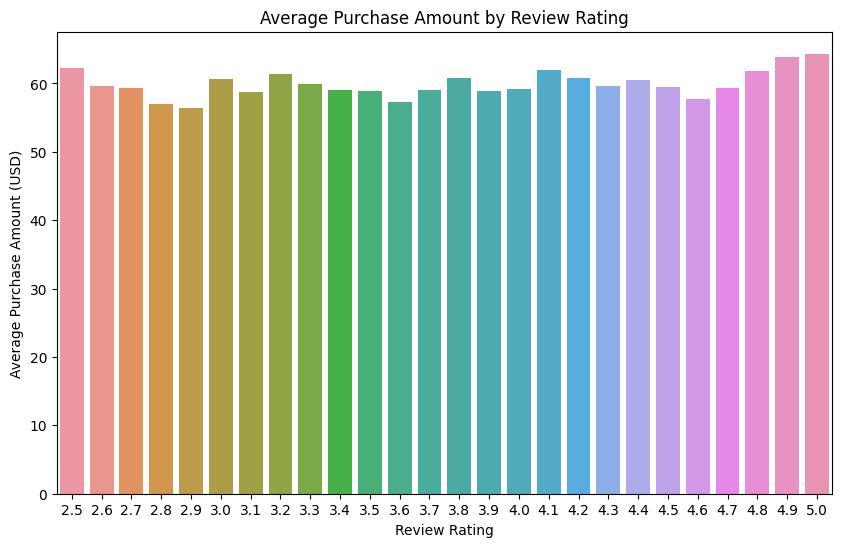

In [57]:
# Visualization for average purchase amount by review rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Rating', y='Purchase Amount (USD)', data=average_purchase_amount_by_review)
plt.title('Average Purchase Amount by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

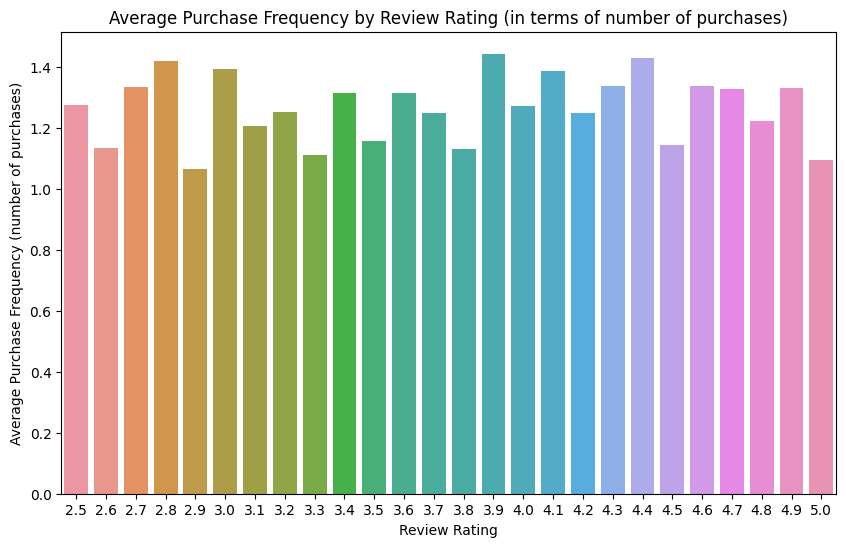

In [58]:
# Visualization for average purchase frequency by review rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Rating', y='AveragePurchaseFrequency', data=average_purchase_frequency_by_review)
plt.title('Average Purchase Frequency by Review Rating (in terms of number of purchases)')
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Frequency (number of purchases)')
plt.show()

In [59]:
# Calculate the distribution of customers by location
customer_counts_by_location = df['Location'].value_counts()
print("Customer Counts by Location:")
print(customer_counts_by_location)

Customer Counts by Location:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey       

In [60]:
# Calculate the average purchase frequency by location (in terms of number of purchases)
average_purchase_frequency_by_location = df.groupby('Location')['AveragePurchaseFrequency'].mean().reset_index()
print("\nAverage Purchase Frequency by Location (in terms of number of purchases):")
print(average_purchase_frequency_by_location)


Average Purchase Frequency by Location (in terms of number of purchases):
          Location  AveragePurchaseFrequency
0          Alabama                  1.535945
1           Alaska                  1.547089
2          Arizona                  1.453043
3         Arkansas                  1.177079
4       California                  1.218245
5         Colorado                  1.211227
6      Connecticut                  1.022521
7         Delaware                  1.001161
8          Florida                  1.233480
9          Georgia                  1.460449
10          Hawaii                  1.830409
11           Idaho                  1.006174
12        Illinois                  1.516187
13         Indiana                  1.422080
14            Iowa                  1.397097
15          Kansas                  1.216556
16        Kentucky                  1.380289
17       Louisiana                  1.350718
18           Maine                  1.108026
19        Maryland       

In [61]:
# Top 10 locations with the most customers
top_locations = customer_counts_by_location.head(10).index

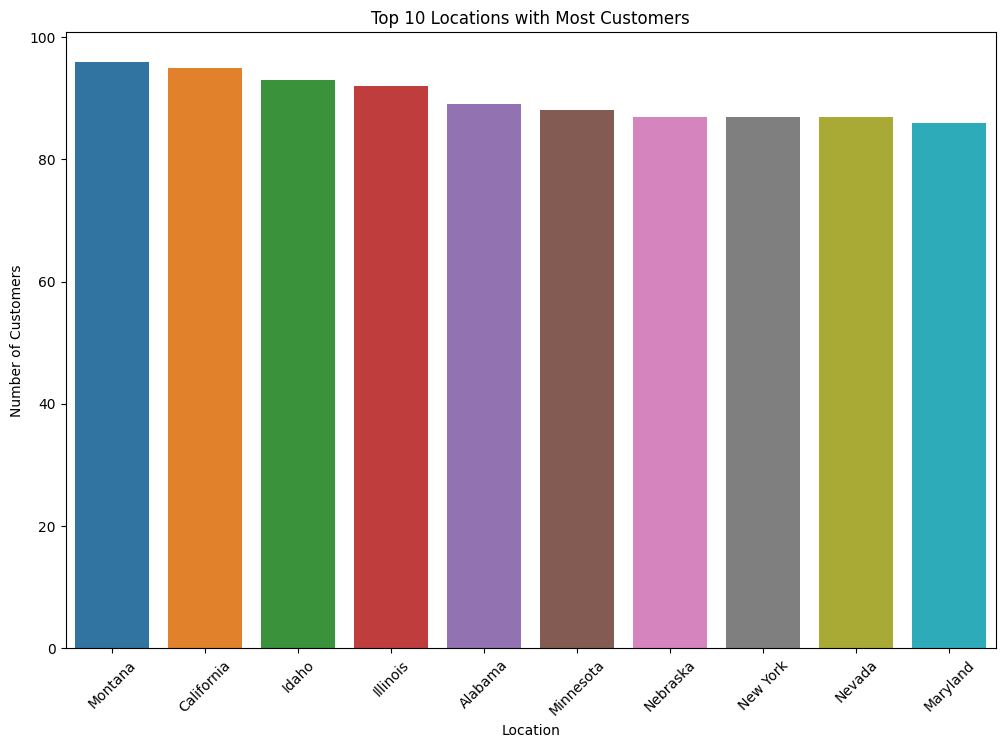

In [62]:
# Visualization for the distribution of customers in the top 10 locations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations, y=customer_counts_by_location[top_locations].values)
plt.title('Top 10 Locations with Most Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

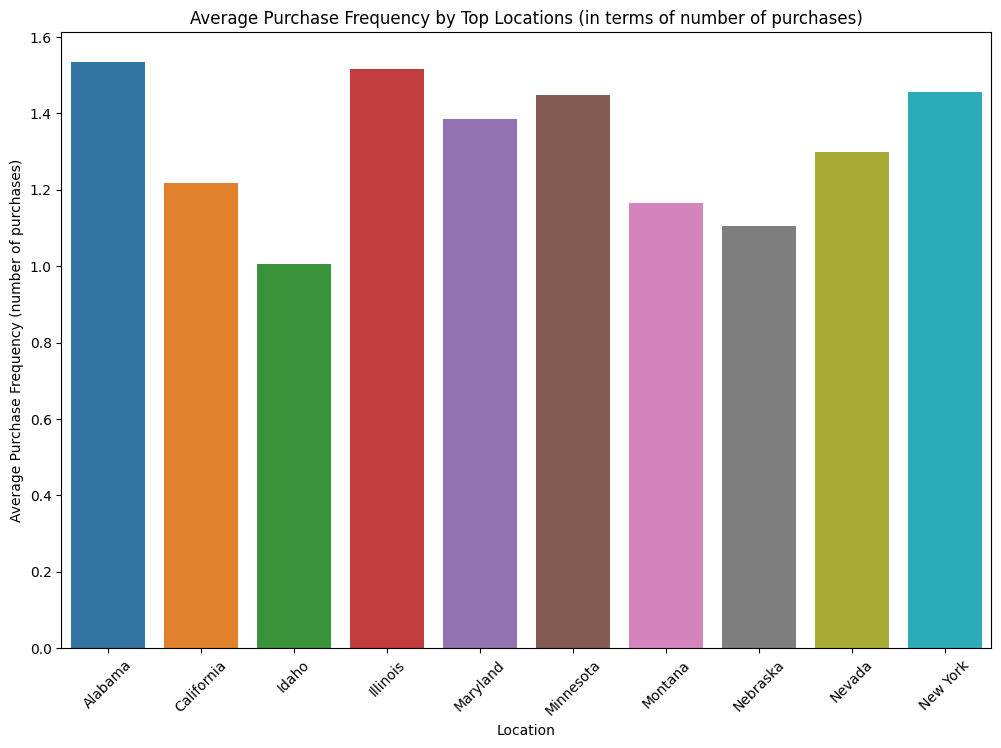

In [63]:
# Visualization for average purchase frequency by top locations
plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='AveragePurchaseFrequency', data=average_purchase_frequency_by_location[average_purchase_frequency_by_location['Location'].isin(top_locations)])
plt.title('Average Purchase Frequency by Top Locations (in terms of number of purchases)')
plt.xlabel('Location')
plt.ylabel('Average Purchase Frequency (number of purchases)')
plt.xticks(rotation=45)
plt.show()

## Conclusion and Reflections

In this analysis, we explored key aspects of customer behavior and purchase patterns in sales data. Here are the main findings and actionable recommendations:

**Age Group Analysis:** The 18-30 age group exhibits a higher purchase frequency in terms of days but has a lower average purchase frequency when calculated using the formula (Previous Purchases + 1) / PurchaseFrequencyDays. This indicates that younger customers shop more frequently but tend to make fewer purchases per visit. Recommendation: Implement cross-selling strategies targeting the 18-30 age group to encourage the purchase of multiple products in a single transaction. For other age groups, focus on campaigns to increase purchase frequency.

**Gender Distribution:** Males dominate the customer base. Recommendation: Tailor marketing strategies and product offerings to cater to male preferences, while also exploring ways to attract more female customers.

**Category Preference:** Clothing is the most popular category. Recommendation: Capitalize on this demand by expanding the clothing range and offering promotions to drive sales in this category.

**Seasonal Trends:** Purchase counts peak during Spring and Fall. Recommendation: Develop seasonal marketing campaigns to leverage these trends and boost sales during these periods.

**Subscription Status:** A significant number of customers are not subscribed. Recommendation: Design incentive programs to encourage subscriptions, such as exclusive discounts or loyalty rewards for subscribers.

**Promo Code Usage:** Customers who use promo codes have a slightly lower average purchase amount but a higher average purchase frequency. Recommendation: Optimize promo code strategies to increase both the frequency and the amount of purchases. Consider targeted promotions to encourage larger transactions.

**Review Ratings:** Higher review ratings are associated with higher purchase amounts. Recommendation: Encourage satisfied customers to leave positive reviews and address any negative feedback to maintain a high level of customer satisfaction.